# Tutorial: Histograms and KDEs in Python

In this tutorial, we will walk through plotting histograms and kde (kernel density estimate) charts using Matplotlib and Seaborn in Python. We use the dataset of **Kaggle Datasets Collection** in this example. This notebook can also be used as a quick reference when you need to make histograms and kdes of various types.

## Loading Data and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('../input/kaggle_datasets.csv')
data.head()

,title,description,url,owner,kernels,discussions,views,downloads,last_updated,license,size,featured,super_featured,upvotes
0,Trending YouTube Video Statistics (UPDATED),"Daily statistics (views, likes, category, tags...",https://www.kaggle.com/datasnaek/youtube-new,Mitchell J,3,4,9484,1668,2018-01-16,CC0,35087677.0,1,0,46
1,7ecb8f4fe2ece9f4c8ffd23af10c310f,NaN,https://www.kaggle.com/veralei/7ecb8f4fe2ece9f...,Vera Lei,0,0,55,2,2018-01-16,Other,127264365.0,0,0,0
2,Atom Dataset,Dataset with atom features,https://www.kaggle.com/chfly2000/nomad2018-ato...,chfly2000,0,0,26,1,2018-01-16,Other,0.0,0,0,0
3,tmptmp,NaN,https://www.kaggle.com/ilyaivanchenko/tmptmp,snow2011,0,0,12,1,2018-01-16,CC0,1635900.0,0,0,0
4,Lab 1 Matrix,NaN,https://www.kaggle.com/tjb5670/lab-1-matrix,Tjb5670,0,0,7,1,2018-01-16,CC0,18.0,0,0,0


In [2]:
data.shape

(8036, 14)

The dataset contains 8036 rows, but there are many datasets uploaded on Kaggle have very few audience or activity. In this case we want to exclude datasets that have neither kernels nor upvotes.

In [3]:
data_ex0 = data.loc[(data.kernels > 0 ) | (data.upvotes > 0), :]
data_ex0.shape

(3443, 14)

Only 3443 rows remain. And we will show the histograms based on this subset of data. Let's run some descriptive statistics as well:

In [4]:
data_ex0.describe()

,kernels,discussions,views,downloads,size,featured,super_featured,upvotes
count,3443.000000,3443.000000,3443.000000,3443.000000,3.442000e+03,3443.000000,3443.000000,3443.000000
mean,13.361603,1.378449,4225.371188,527.414464,1.159205e+09,0.363636,0.005809,12.835318
std,90.472048,5.325486,17874.320551,2440.750623,5.747307e+10,0.481116,0.076005,48.568466
min,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,0.000000,78.500000,7.000000,1.292562e+05,0.000000,0.000000,0.000000
50%,1.000000,0.000000,577.000000,46.000000,2.360236e+06,0.000000,0.000000,2.000000
75%,4.000000,1.000000,2331.000000,233.000000,4.041596e+07,1.000000,0.000000,9.000000
max,3390.000000,113.000000,429745.000000,59399.000000,3.371476e+12,1.000000,1.000000,1131.000000


## Basic Histograms

As a starting point, we plot a histogram of the distribution of the number of discussion threads using **plt.hist()** function in Matplotlib:

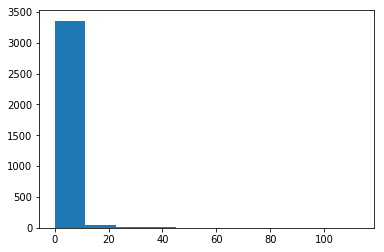

In [5]:
plt.hist(data_ex0.discussions); # The ';' is to avoid showing a message before the chart

We can also plot by .plot() method in pandas, which also uses Matplotlib:

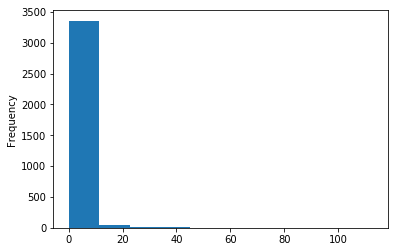

In [6]:
data_ex0.discussions.plot(kind='hist'); 

In both charts, it seems there is nothing beyond 50 or so. Let us look at the maximum values:

In [7]:
data_ex0.nlargest(10, 'discussions').loc[:,['title','discussions']]

,title,discussions
7869,European Soccer Database,113
7702,Human Resources Analytics,103
7929,Iris Species,90
5715,TMDB 5000 Movie Dataset,89
7822,Credit Card Fraud Detection,73
7074,2013 American Community Survey,64
8018,Meta Kaggle,58
7069,Climate Change: Earth Surface Temperature Data,43
7981,Pokemon with stats,43
6238,Medical Appointment No Shows,42


Two datasets have more than 100 discussions but most of them have zero or a few. When the data is very skewed and has a long tail, a default histogram will not give much information. We will show how to display the histograms in different ways for a closer look of data.

## Customization of Histograms

In this part we will show various arguments we can use to show the histograms differently to get a better sense of how the data is distributed. We will use the distribution of the number of kernels in this example:

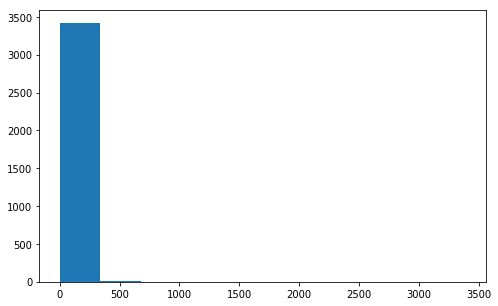

In [8]:
# Default plot
plt.figure(figsize=(8,5)) # Specify the figure size
plt.hist(data_ex0.kernels)
plt.show()

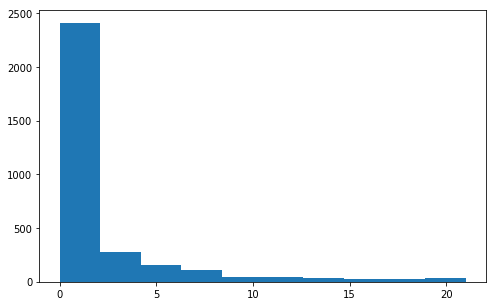

In [9]:
# Zoom in to distribution of 0-20 kernels
plt.figure(figsize=(8,5))
plt.hist(data_ex0.kernels, range = (0, 21))
plt.show()

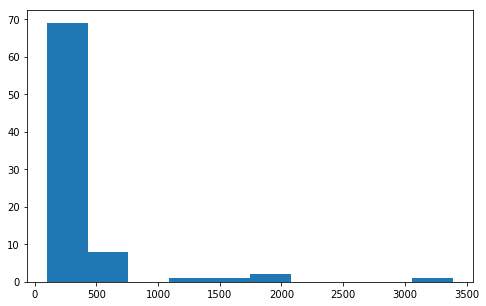

In [10]:
# Look at the tail ends
plt.figure(figsize=(8,5))
plt.hist(data_ex0.kernels, range = (100, data_ex0.kernels.max())) # 100 up to highest number of kernels
plt.show()

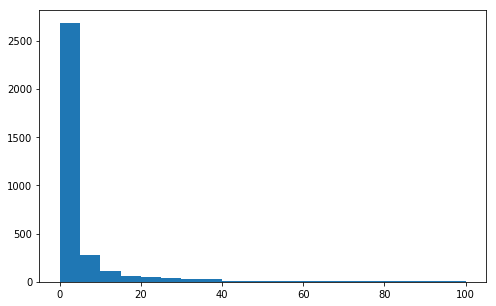

In [11]:
# Zero to 100 kernels in 20 bins
plt.figure(figsize=(8,5))
plt.hist(data_ex0.kernels, range = (0, 100), bins = 20)
plt.show()

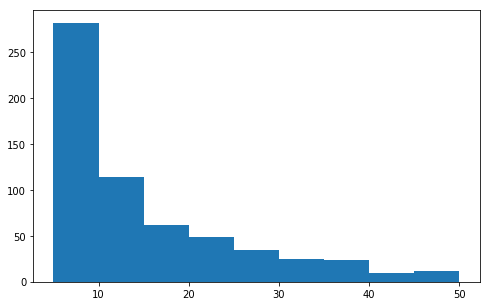

In [12]:
# Use a numpy array to specify how the bins are separated
plt.figure(figsize=(8,5))
plt.hist(data_ex0.kernels, bins = np.arange(5, 51, 5)) # 5-10, 10-15... up to 45-50
plt.show()

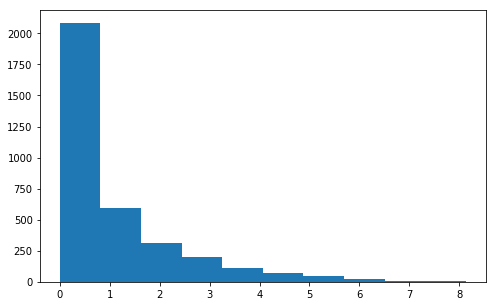

In [13]:
# Taking logarithm on the x-axis
plt.figure(figsize=(8,5))
plt.hist(np.log1p(data_ex0.kernels)) # Use np.log1p instead of np.log to avoid error taking log of 0
plt.show()

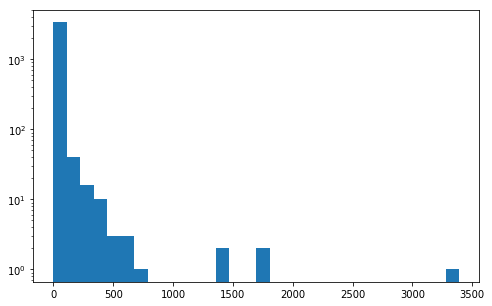

In [14]:
# Taking logarithm on the y-axis
plt.figure(figsize=(8,5))
plt.hist(data_ex0.kernels, bins=30, log=True)
plt.show()

## Completing the Charts

It's time to add title, axes labels, and change color of the histograms.

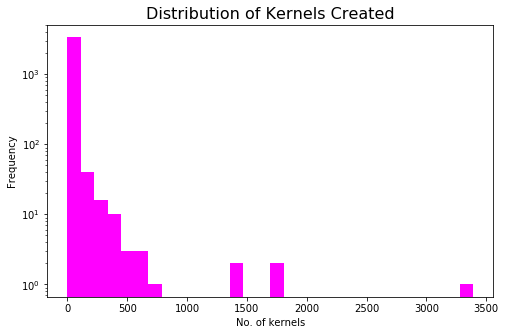

In [15]:
plt.figure(figsize=(8,5))
plt.hist(data_ex0.kernels, bins=30, log=True, color = 'fuchsia')
plt.title('Distribution of Kernels Created', fontsize=16)
plt.xlabel('No. of kernels')
plt.ylabel('Frequency')
plt.show()

Reference:
- [matplotlib.pyplot.hist() documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)
- [List of color names](https://matplotlib.org/gallery/color/named_colors.html)

## KDE Charts - The Basics

Instead of histograms, we can also plot kdes so that the distribution is shown as lines instead of rectangular bars. We will plot the distribution of upvotes:

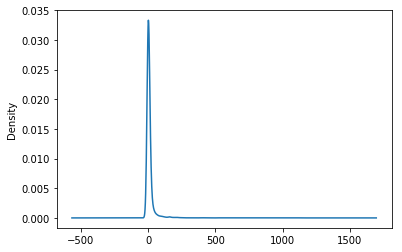

In [16]:
data_ex0.upvotes.plot.kde();

The above chart looks strange as the number of upvotes cannot be positive. We can set the range to display with ind argument:

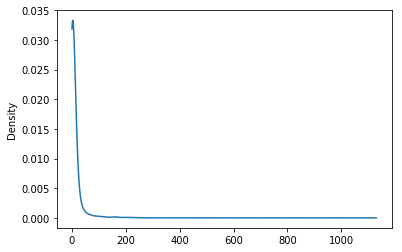

In [17]:
data_ex0.upvotes.plot.kde(ind = np.arange(0, data_ex0.upvotes.max()));

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


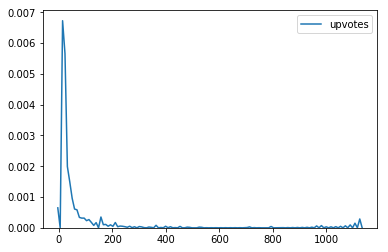

In [18]:
sns.kdeplot(data_ex0.upvotes);

We can use the clip arguments to limit the datapoints to which the kde fits:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


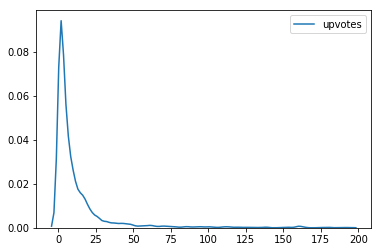

In [19]:
sns.kdeplot(data_ex0.upvotes, clip = (0,200));

## KDE Plots of More Than One Factor

Then we make the last sets of charts by plotting kdes grouped by factor so that we can visualize the difference in distribution among factor values. Here we separate the data by whether they are 'featured' datasets and plot the distribution of upvotes:

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


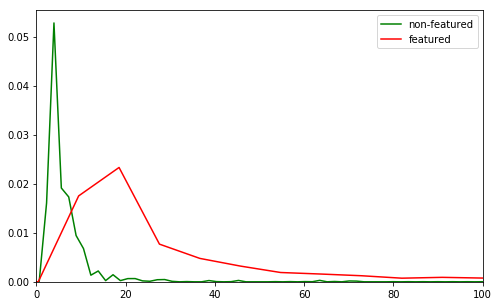

In [20]:
# Do it with Seaborn
plt.figure(figsize=(8,5))
sns.kdeplot(data_ex0.loc[data_ex0.featured == 0, 'upvotes'], color='green', label='non-featured')
sns.kdeplot(data_ex0.loc[data_ex0.featured == 1, 'upvotes'], color='red', label='featured')
plt.xlim(0, 100) # Limit the view from 0 to 100
plt.show()

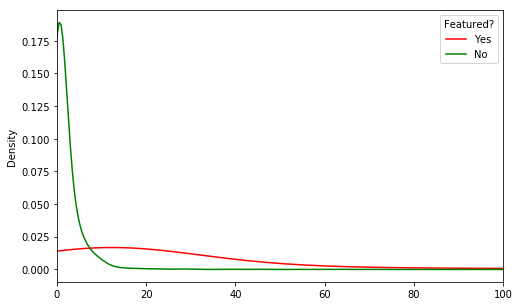

In [21]:
# Do it with Matplotlib
plt.figure(figsize=(8,5))
data_ex0.loc[data_ex0.featured == 1, 'upvotes'].plot.kde(color='red')
data_ex0.loc[data_ex0.featured == 0, 'upvotes'].plot.kde(color='green')
plt.legend(('Yes', 'No'), title='Featured?')
plt.xlim(0,100)
plt.show()

It is seen that featured datasets tend to have more upvotes than the non-featured ones.

The looks of kde plots using Seaborn and Matplotlib are different because they use a different kernel estimate, which is beyond the scope of this notebook.

Reference documentation:
- [pandas.DataFrame.plot.kde()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html)
- [Seaborn.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

That's it for now. Happy plotting!